# Neural Network: deep regression


---

## Creation of a synthetic dataset


In [ ]:
import numpy as np # linear algebra
import jax 
import jax.numpy as jnp
import jax.nn
import pylab as plt
from jax.config import config
config.update('jax_enable_x64', True)

In [ ]:
import datetime 
Date = datetime.date(2022,1,3)

In [ ]:
print(Date)

2022-01-03


In [ ]:
# dataset creating
def func(x):
    return np.sin(4*x)

N = 1000
noise_std = 0.3
data_x = np.random.normal(0,1,N)
data_y = func(data_x) + noise_std*np.random.normal(0,1,N)

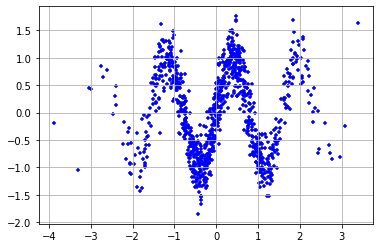

In [ ]:
# dataset visualization
plt.scatter(data_x, data_y, s=10, color="blue", marker="+")
plt.grid(True)

In [ ]:
# store the dimensions of each layers
dim_input = 1
dim_output = 1

neural_net_dims = [dim_input, 20, 30, dim_output]
# nb_hidden_layers = len(neural_net_dims)

def param_initialization(neural_net_dims):
    """
    Desc: 
    ====
    this function generates the list of the matrices and weights vectors
    needed to define the neural net
    
    input:
    =====
    neural_net_dims: list of the dimensions of each layera
    
    output:
    ======
    a list of the type
       [A_1, bias_1, A_2, bias_2, ... , A_n, bias_n]
    containing the matrices and weights
    """
    params = [] # parameters are stored in this list
    n_layers = len(neural_net_dims)
    for layer_index in range(1, n_layers):
        dim_layer_before = neural_net_dims[layer_index-1]
        dim_layer = neural_net_dims[layer_index]

        # random matrix generation
        # Remark: you may need to change the noise level ** TODO **

        # choose variance such that neurons have variance approximately 1 
        std = 1/np.sqrt(dim_layer_before)
        random_matrix = std*np.random.normal(0,1.,size = (dim_layer,dim_layer_before))
        params.append(random_matrix)

        # random bias generatrion
        # Remark: you may need to change the noise level ** TODO **
        params.append(np.random.normal(0,1,size=dim_layer) )
    return params

In [ ]:
param_initialization(neural_net_dims)

[array([[-1.6253777 ],
        [ 0.27741754],
        [ 1.49019528],
        [-0.29761441],
        [ 0.55538893],
        [-0.97643146],
        [-0.13670374],
        [ 0.08501925],
        [-0.42599953],
        [-0.56087576],
        [ 0.41749153],
        [ 0.60394882],
        [ 1.34251181],
        [ 0.47900516],
        [ 0.20063538],
        [-0.42986495],
        [-2.21628602],
        [-0.34132525],
        [ 0.38140124],
        [ 0.97887615]]),
 array([ 0.47551135,  0.85017086,  1.10397883,  0.17334899,  1.79621641,
        -0.72560994,  0.40072389,  0.30586137, -1.96630224, -0.92358591,
        -0.71394386, -1.50872905, -0.54498923, -1.27181386,  1.26600872,
         0.04463268, -1.14864967,  1.31987183, -0.5240833 ,  1.08459802]),
 array([[-0.020733  ,  0.26761905,  0.12274114, -0.13444456,  0.12797954,
         -0.4382089 , -0.13498513, -0.23982289,  0.09117629, -0.14877525,
          0.32705061, -0.30685092, -0.10818429, -0.26417163, -0.16908035,
          0.23208864, 

In [ ]:
[param.shape for param in param_initialization(neural_net_dims)]

[(20, 1), (20,), (30, 20), (30,), (1, 30), (1,)]

In [ ]:
def net_single(params,x_input):
  '''
  desc:
    ====
    This function takes the list of neural weights 
    and a vector of input and compute the output of the network
    
    input:
    =====
    params: list of parameters (created by the function `param_initialization`)
    x_input: a vector that will be processed
  '''
  n_layers = len(params) // 2 
  output = x_input 

  for layer_idx in range(n_layers-1):
    A = params[2*layer_idx]
    bias = params[2*layer_idx + 1]

    # linear operation 
    output = A @ output + bias 

    # non-linear operation 
    output = jnp.sin(output)
  
  idx = n_layers - 1
  A = params[2*idx]
  bias = params[2*idx + 1]
  output = A @ output + bias 
  
  
  return output 


# to process a batch of inputs
net_batch = jax.vmap(net_single, in_axes=(None,0))

In [ ]:
x = np.array([1.])
# initialize weights at random 
params = param_initialization(neural_net_dims)
x_batch = np.random.normal(0,1,size = (1000,1))
net_batch(params,x_batch)

DeviceArray([[-2.59874187e-01],
             [ 5.60421937e-03],
             [-2.53448386e-01],
             [-4.57184104e-01],
             [ 1.19752068e-01],
             [-3.70579822e-01],
             [-8.83539447e-02],
             [ 2.65916164e-02],
             [-2.63686638e-01],
             [-2.57413786e-01],
             [-1.52679908e-01],
             [-2.78108521e-01],
             [-2.55461113e-01],
             [ 5.54712627e-02],
             [-2.85226292e-01],
             [-1.51551674e-01],
             [-1.15217492e-01],
             [ 1.23855740e-01],
             [-2.58406496e-01],
             [-3.77778610e-01],
             [ 3.33119763e-01],
             [-1.76885716e-01],
             [ 4.71845849e-02],
             [ 1.04702685e-01],
             [ 1.60220741e-01],
             [ 2.26509207e-01],
             [ 5.91724343e-02],
             [-7.34019829e-02],
             [-1.28746945e-01],
             [-2.10754151e-01],
             [-2.81094464e-02],
        

## Visualization of initial neural network

Initialize the neural network and display the function represented by the neural network

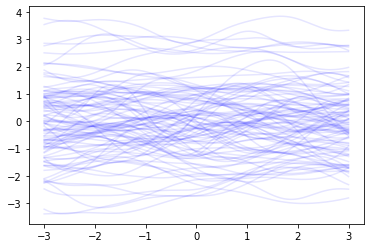

In [ ]:
xs = np.linspace(-3,3,1000)
xs = xs.reshape(-1,1)  # needs two dimensions

for _ in range(100):
  params = param_initialization(neural_net_dims)
  ys = net_batch(params,xs)
  plt.plot(xs[:,0],ys[:,0],color = "blue",alpha = 0.1)


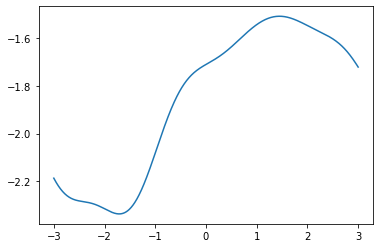

In [ ]:
plt.plot(xs[:,0],ys[:,0])

## Fitting to data
1. implement the fitting with gradient descent
2. Try with the Adam. See the original paper here: [https://arxiv.org/abs/1412.6980](https://arxiv.org/abs/1412.6980)
3. if time permits, try to create an animation of the neural network during the training with the [celluloid](https://github.com/jwkvam/celluloid) package

In [ ]:
def loss(params,xs,ys):
  pred = net_batch(params,xs)
  error = ys[:,0]-pred[:,0]
  return jnp.mean(error ** 2)

In [ ]:
params = param_initialization(neural_net_dims)

In [ ]:
# calculate gradient wrt to parameters 
net_value_grad = jax.jit(jax.value_and_grad(loss,argnums = 0))

In [ ]:
val,grad = net_value_grad(params,xs,ys)

In [ ]:
val

DeviceArray(4.36672864, dtype=float64)

In [ ]:
[g.shape for g in grad]

[(20, 1), (20,), (30, 20), (30,), (1, 30), (1,)]

In [ ]:
loss(params,xs,ys)

DeviceArray(4.36672864, dtype=float64)

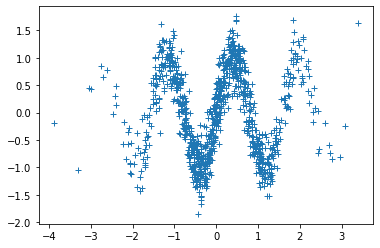

In [ ]:
# parameters need to be 2 dimensional 
X = data_x.reshape(-1,1)
Y = data_y.reshape(-1,1)
plt.plot(X[:,0],Y[:,0],"+")

**Perform Gradient Descent to find optimal parameters**

In [ ]:
iters = 1000
history = []
learning_rate = 0.1

for _ in range(iters):
  val,grad = net_value_grad(params,X,Y)
  # paramaters stored in a list 
  # gradient update 
  params = [p - learning_rate * g for (p,g) in zip(params,grad)]
  history.append(val)

In [ ]:
print(history)

[DeviceArray(1.06729248, dtype=float64), DeviceArray(0.83110174, dtype=float64), DeviceArray(1.56137466, dtype=float64), DeviceArray(4.82439305, dtype=float64), DeviceArray(14.43037637, dtype=float64), DeviceArray(17.58176197, dtype=float64), DeviceArray(1.11061497, dtype=float64), DeviceArray(0.62162103, dtype=float64), DeviceArray(0.58609075, dtype=float64), DeviceArray(0.56381586, dtype=float64), DeviceArray(0.54829045, dtype=float64), DeviceArray(0.53580005, dtype=float64), DeviceArray(0.5246923, dtype=float64), DeviceArray(0.51414479, dtype=float64), DeviceArray(0.50374003, dtype=float64), DeviceArray(0.49327261, dtype=float64), DeviceArray(0.48261702, dtype=float64), DeviceArray(0.47170751, dtype=float64), DeviceArray(0.46049511, dtype=float64), DeviceArray(0.44895352, dtype=float64), DeviceArray(0.43706219, dtype=float64), DeviceArray(0.42481414, dtype=float64), DeviceArray(0.41220783, dtype=float64), DeviceArray(0.39925354, dtype=float64), DeviceArray(0.38596879, dtype=float64)

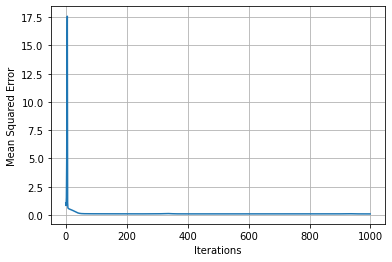

In [ ]:
plt.plot(history)
plt.ylabel("Mean Squared Error")
plt.xlabel("Iterations")
plt.grid(True)

**Comparing Neural Network Results with actual function**

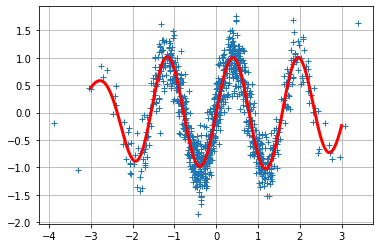

In [ ]:
plt.plot(X[:,0],Y[:,0],"+")
xs = np.linspace(-3,3,1000)
xs = xs.reshape(-1,1)  # needs two dimensions
ys = net_batch(params,xs)
plt.plot(xs[:,0],ys[:,0],color = "red",lw = 3)
plt.grid(True)

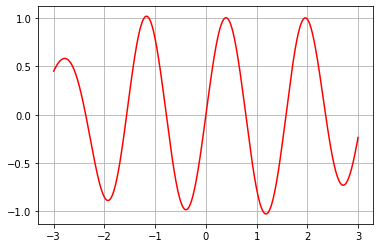

In [ ]:
xs = np.linspace(-3,3,1000)
xs = xs.reshape(-1,1)  # needs two dimensions
ys = net_batch(params,xs)
plt.plot(xs[:,0],ys[:,0],color = "red")
plt.grid(True)

Stochastic Gradient Descent 

In [ ]:
iters = 1000
sgd_history = []
learning_rate = 0.1
batch_size = 30

for _ in range(iters):
  val,grad = net_value_grad(params,X,Y)
  # paramaters stored in a list 
  # gradient update 
  batch_indices = np.random.choice(len(X), size=batch_size, replace=False)
  current_loss, grads = net_value_grad(params, X[batch_indices], Y[batch_indices])
  params = [p - learning_rate * g for (p,g) in zip(params,grad)]
  sgd_history.append(val)

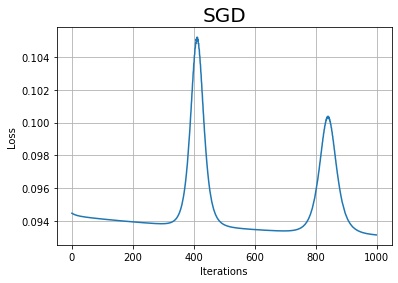

In [ ]:
plt.plot(sgd_history, "-")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("SGD", fontsize=20)
plt.grid(True)

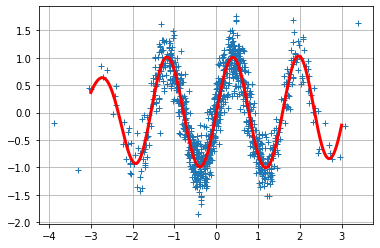

In [ ]:
plt.plot(X[:,0],Y[:,0],"+")
xs = np.linspace(-3,3,1000)
xs = xs.reshape(-1,1)  # needs two dimensions
ys = net_batch(params,xs)
plt.plot(xs[:,0],ys[:,0],color = "red",lw = 3)
plt.grid(True)

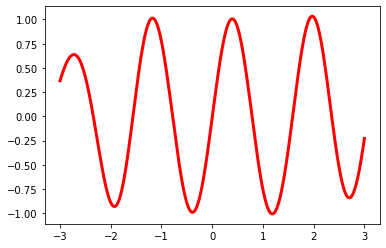

In [ ]:
xs = np.linspace(-3,3,1000)
xs = xs.reshape(-1,1)  # needs two dimensions
ys = net_batch(params,xs)
plt.plot(xs[:,0],ys[:,0],color = "red",lw = 3)

**Adam Optimizer**

In [ ]:
niter = 1000
loss_history = []
learning_rate = 0.1
batch_size = 30

# initialize running means of gradient and its square
current_loss, grads = net_value_grad(params, X[batch_indices], Y[batch_indices])
params_running_means = [g for g in grads]
params_running_square = [g**2 for g in grads]

beta_1 = 0.9
beta_2 = 0.9
eps = 0.001


for _ in range(niter):
    batch_indices = np.random.choice(len(X), size=batch_size, replace=False)
    current_loss, grads = net_value_grad(params, X[batch_indices], Y[batch_indices])
    
    # update the running means
    params_running_means = [beta_1*g_old + (1.-beta_1)*g_new for \
                            (g_old, g_new) in zip(params_running_means, grads)]
    params_running_square = [beta_2*g_sq_old + (1.-beta_2)*(g_new**2) for \
                            (g_sq_old, g_new) in zip(params_running_square, grads)]

    # usual SGD update 
    grad_normalized = [g_mean / (np.sqrt(g_sq)+eps) for \
                       (g_mean, g_sq) in zip(params_running_means, params_running_square)]
    params = [p - learning_rate*g for (p,g) in zip(params, grad_normalized)]

    loss_history.append(current_loss)
    

In [ ]:
print(loss_history)

[DeviceArray(0.09330782, dtype=float64), DeviceArray(4.98650826, dtype=float64), DeviceArray(1.99104913, dtype=float64), DeviceArray(0.46629297, dtype=float64), DeviceArray(1.2780502, dtype=float64), DeviceArray(1.06309997, dtype=float64), DeviceArray(0.41488329, dtype=float64), DeviceArray(0.48224385, dtype=float64), DeviceArray(0.53643458, dtype=float64), DeviceArray(0.7622945, dtype=float64), DeviceArray(0.51184457, dtype=float64), DeviceArray(0.33219481, dtype=float64), DeviceArray(0.43836276, dtype=float64), DeviceArray(0.48529855, dtype=float64), DeviceArray(0.28121407, dtype=float64), DeviceArray(0.29826163, dtype=float64), DeviceArray(0.43589755, dtype=float64), DeviceArray(0.4615431, dtype=float64), DeviceArray(0.23069702, dtype=float64), DeviceArray(0.36114734, dtype=float64), DeviceArray(0.25545518, dtype=float64), DeviceArray(0.19927426, dtype=float64), DeviceArray(0.19859755, dtype=float64), DeviceArray(0.29123624, dtype=float64), DeviceArray(0.20818165, dtype=float64), De

Text(0.5, 1.0, 'ADAM')

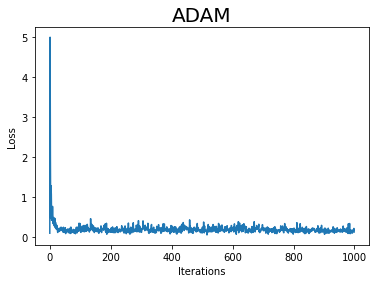

In [ ]:
plt.plot(loss_history, "-")
plt.xlabel("Iterations")
plt.ylabel("Loss")
plt.title("ADAM", fontsize=20)

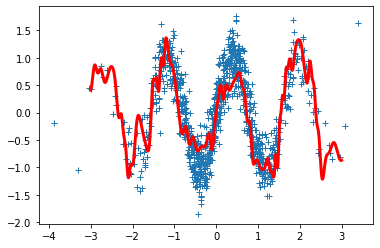

In [ ]:
X = data_x.reshape(-1,1)
Y = data_y.reshape(-1,1)

plt.plot(X[:,0], Y[:,0], "+")

xs = np.linspace(-3,3,1000)
xs = xs.reshape(-1,1)  # needs two dimensions

ys = net_batch(params, xs)
plt.plot(xs[:,0], ys[:,0], color="red", lw=3)